In [1]:

import tensorflow as tf
import numpy as np
from glob import glob as glob

from mrl import *

from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

/Users/abeukers/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [47]:
fpathL = glob('models/sweep2/*/*/*eval*.npy')
fpathL

['models/sweep2/state_30-gamma_70-opt_adam-lr_500e-5/002/state_30-gamma_70-opt_adam-lr_500e-5-trepochs4500-evalrewards82.npy',
 'models/sweep2/state_30-gamma_70-opt_adam-lr_500e-5/002/state_30-gamma_70-opt_adam-lr_500e-5-trepochs1500-evalrewards82.npy',
 'models/sweep2/state_30-gamma_70-opt_adam-lr_500e-5/002/state_30-gamma_70-opt_adam-lr_500e-5-trepochs3000-evalrewards28.npy',
 'models/sweep2/state_30-gamma_70-opt_adam-lr_500e-5/002/state_30-gamma_70-opt_adam-lr_500e-5-trepochs3000-evalrewards82.npy',
 'models/sweep2/state_30-gamma_70-opt_adam-lr_500e-5/002/state_30-gamma_70-opt_adam-lr_500e-5-trepochs4500-evalrewards28.npy',
 'models/sweep2/state_30-gamma_70-opt_adam-lr_500e-5/002/state_30-gamma_70-opt_adam-lr_500e-5-trepochs1500-evalrewards28.npy']

/Users/abeukers/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


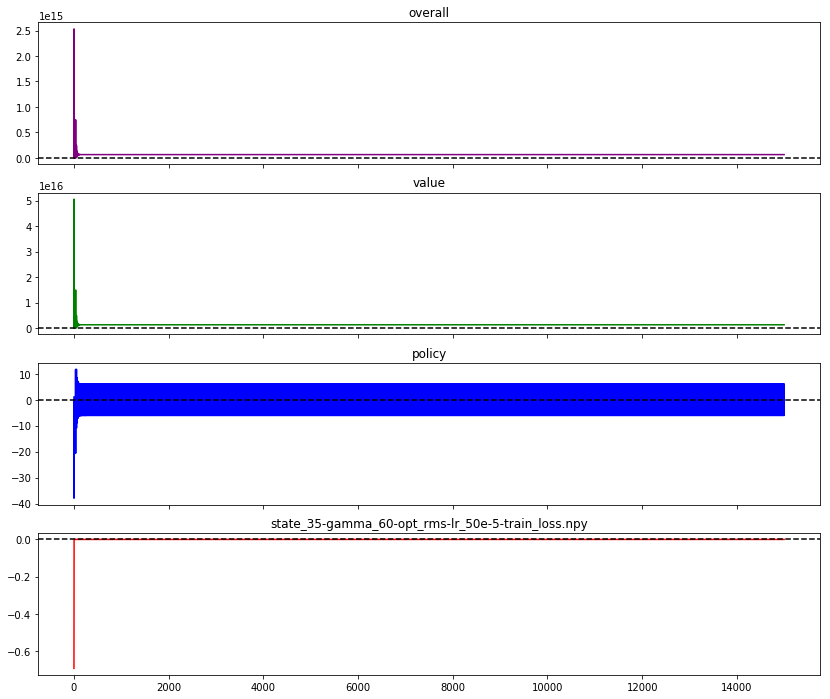

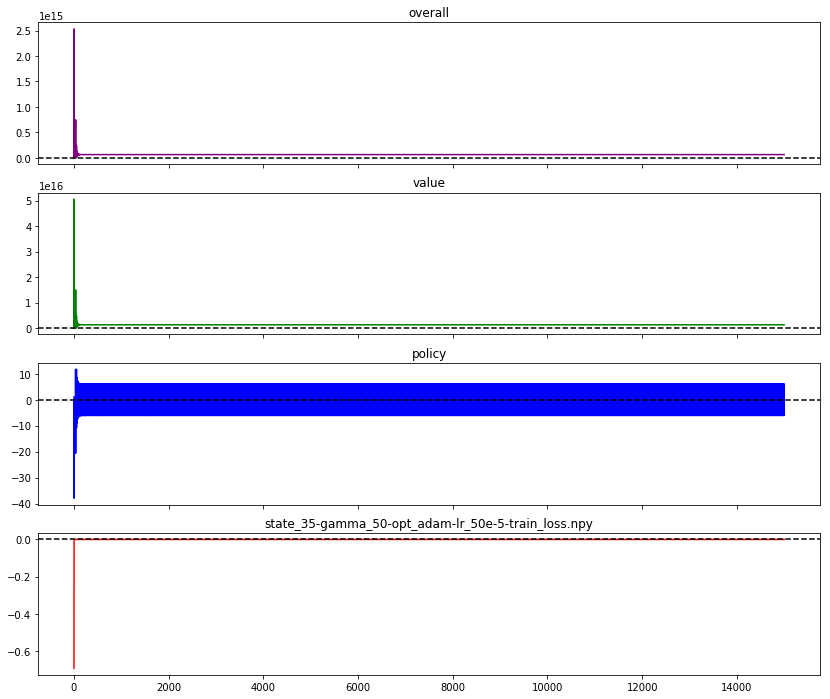

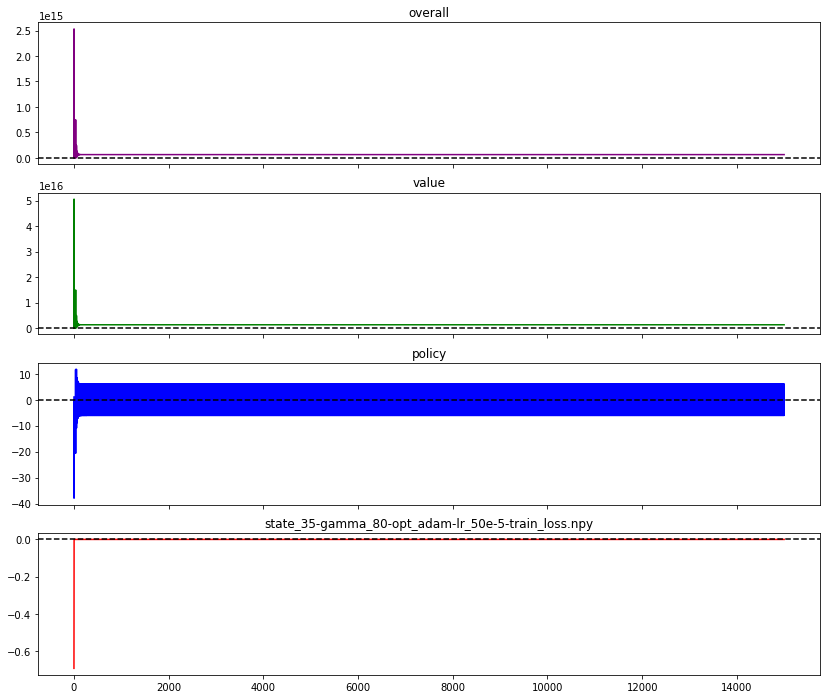

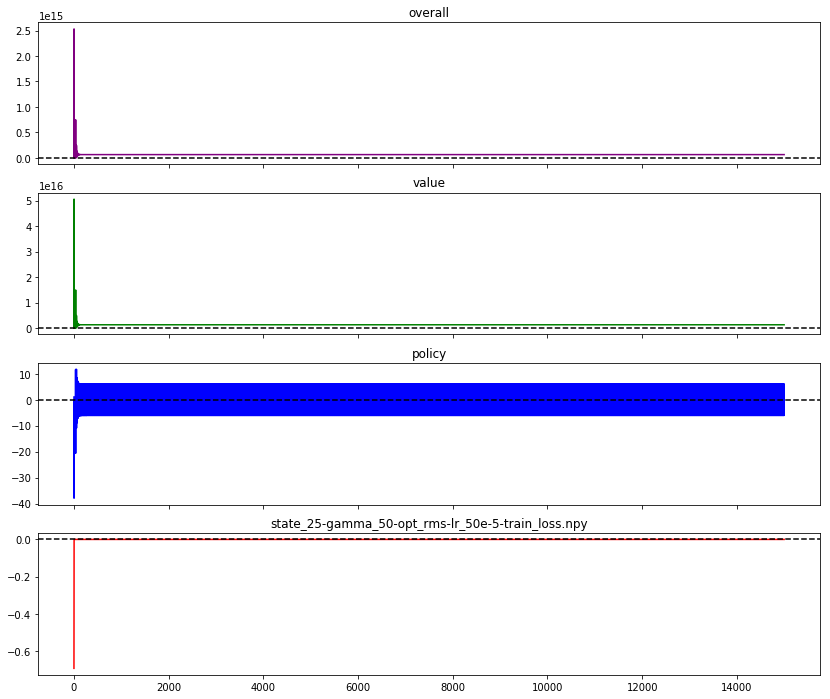

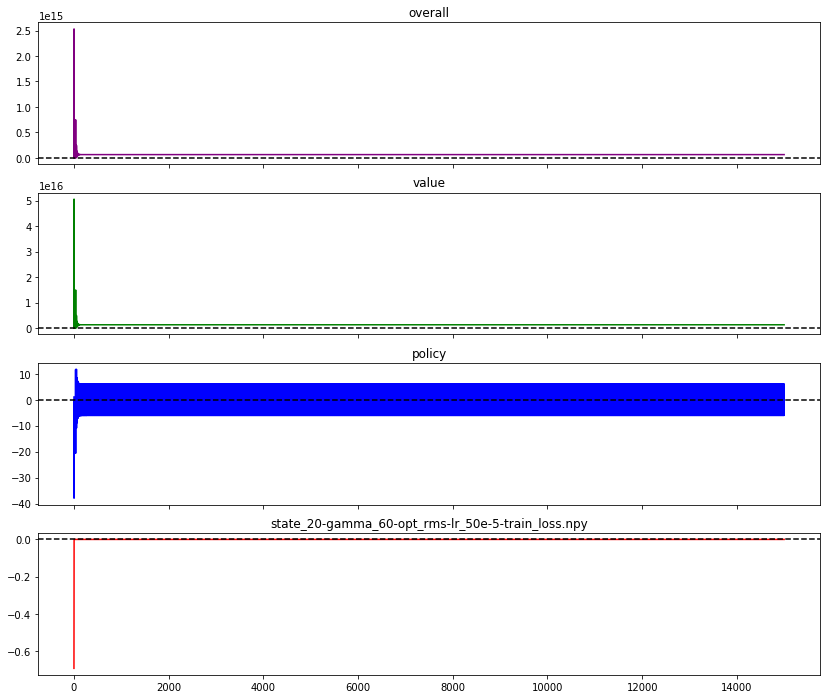

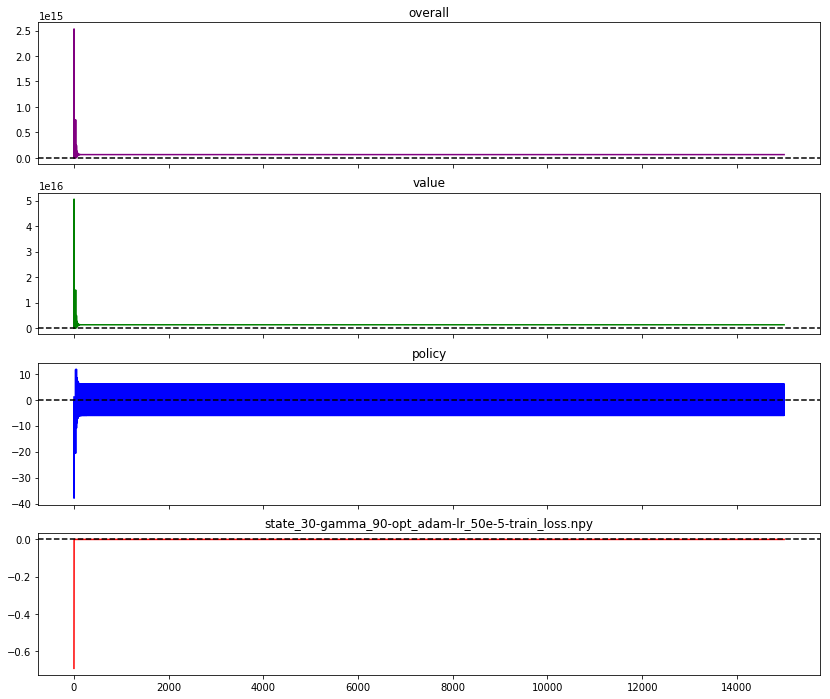

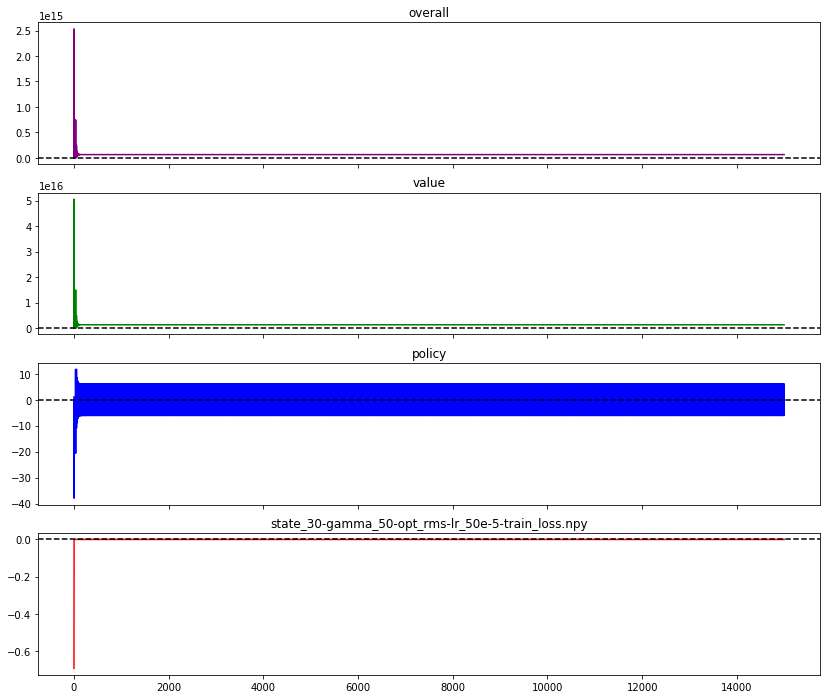

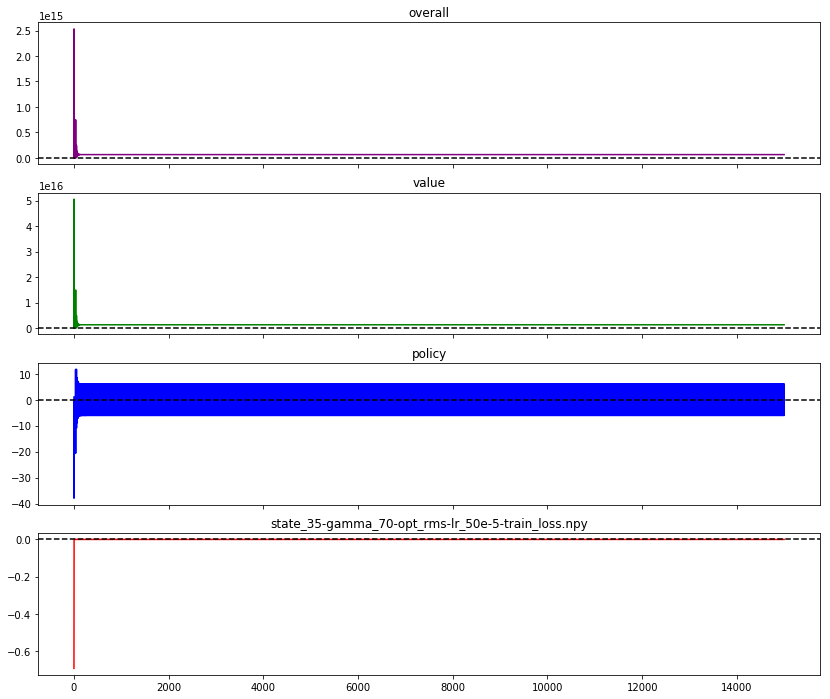

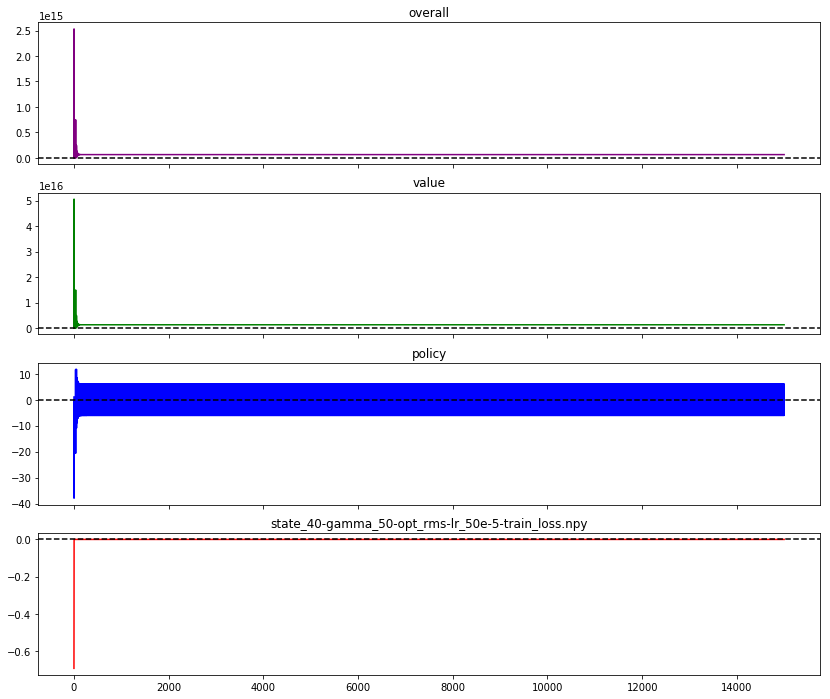

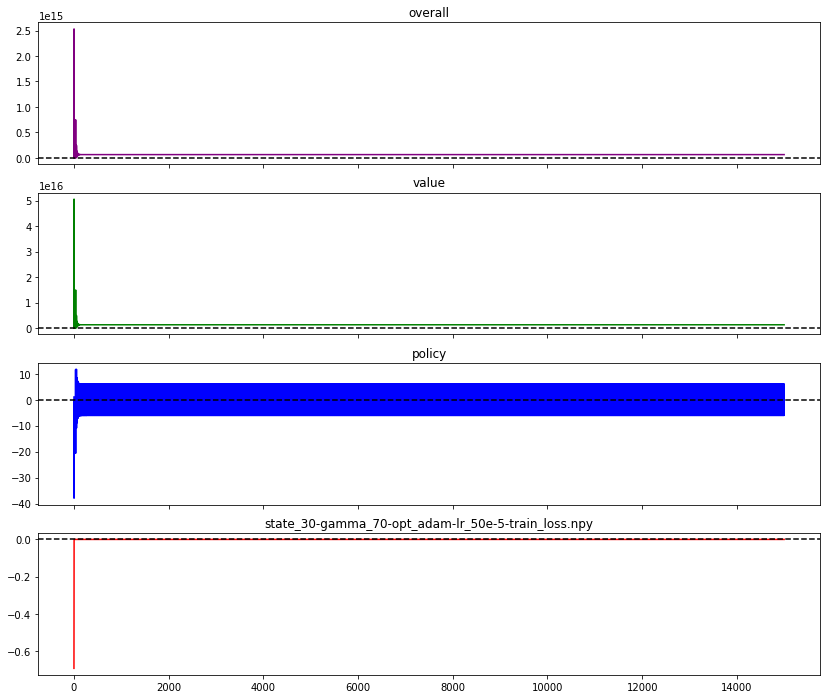

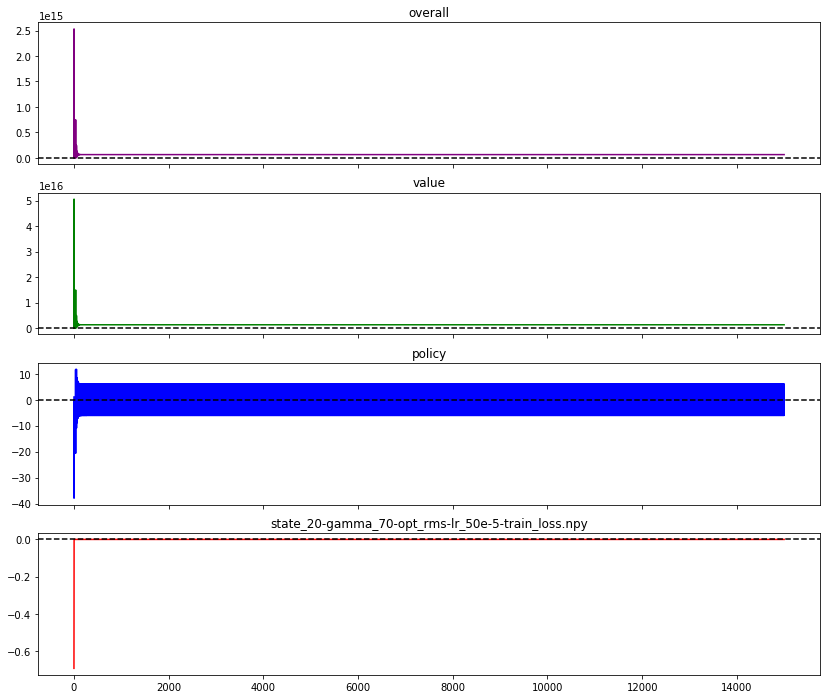

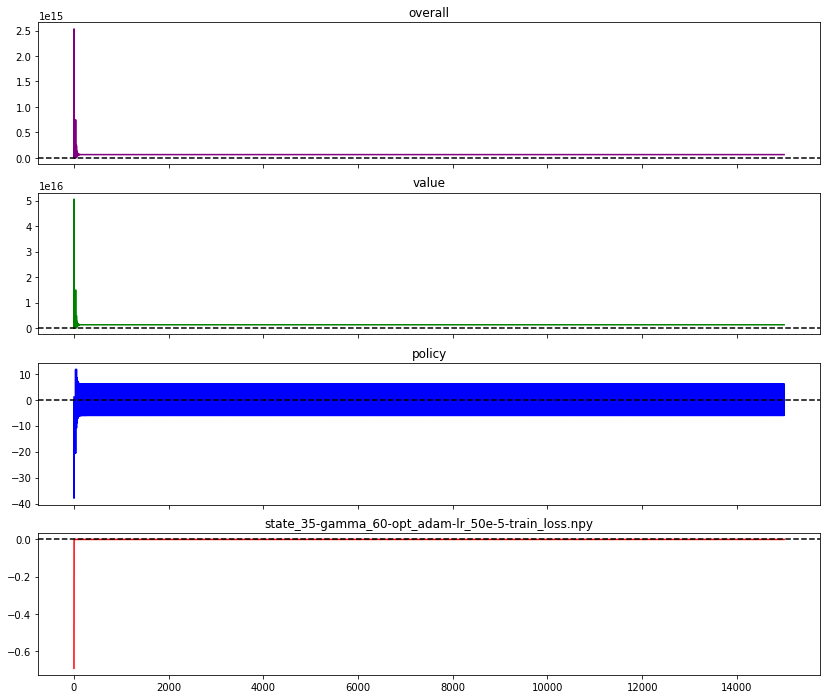

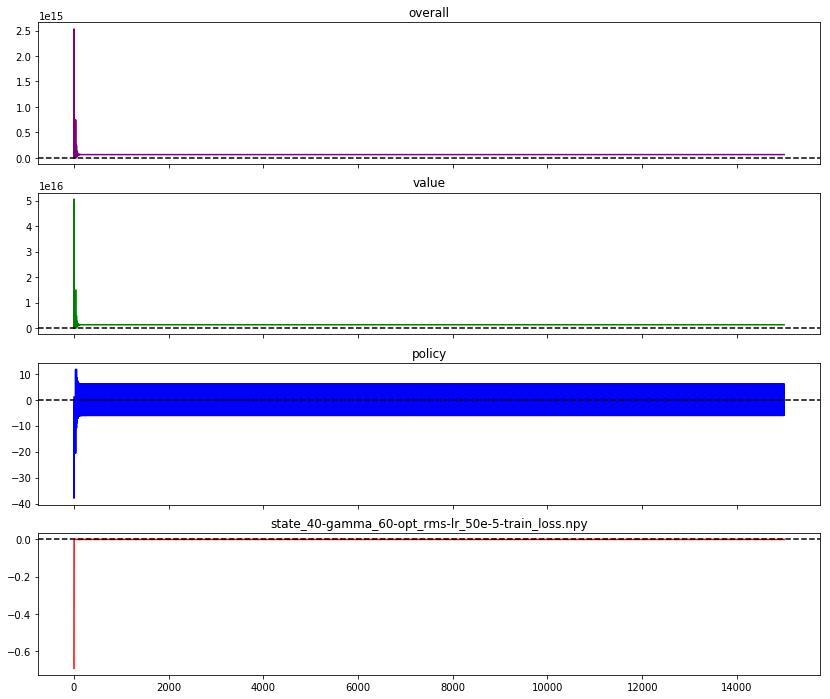

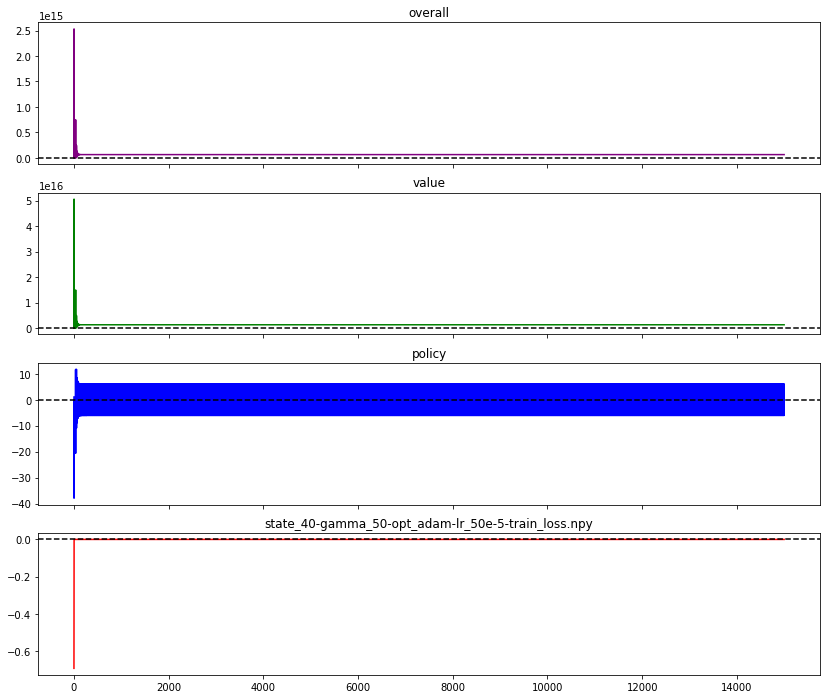

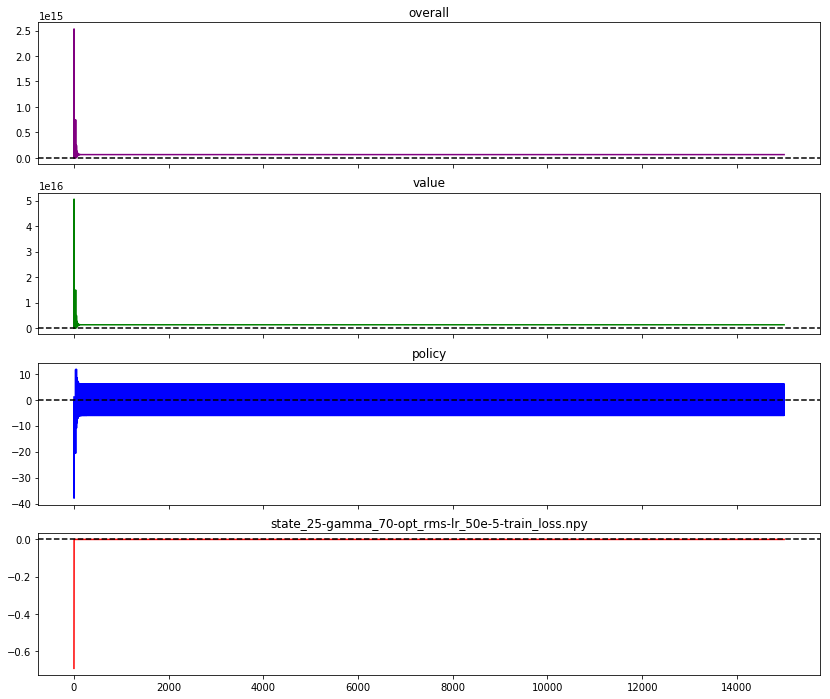

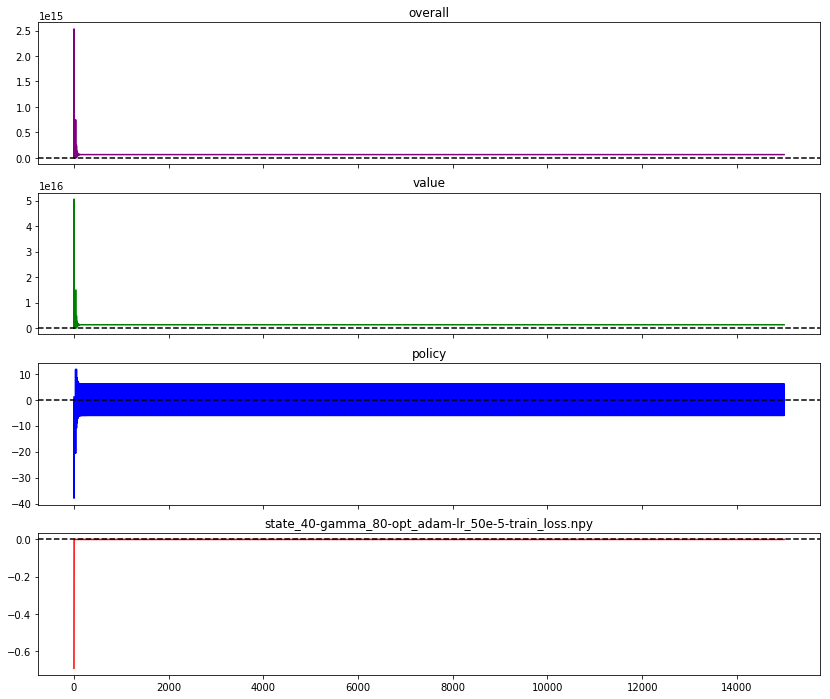

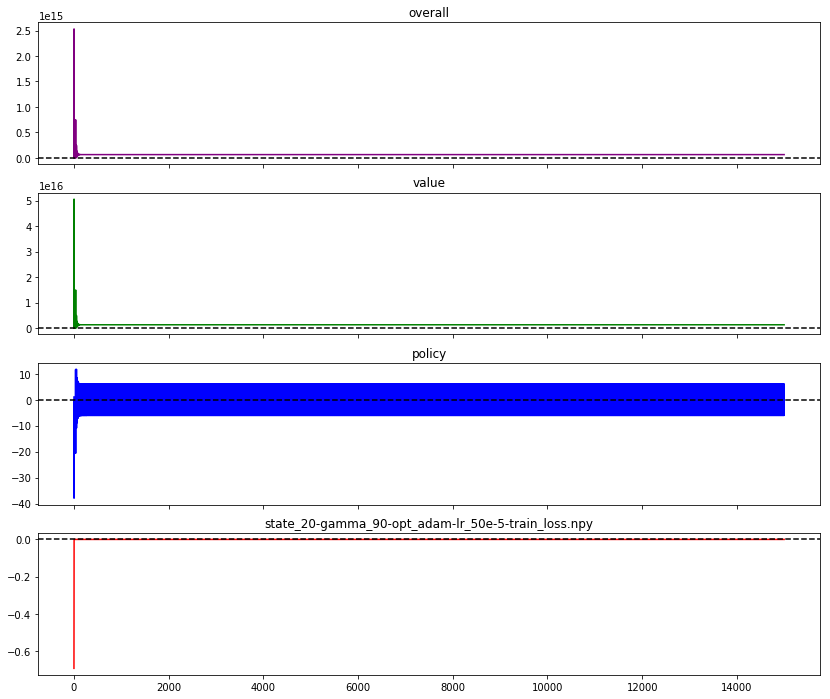

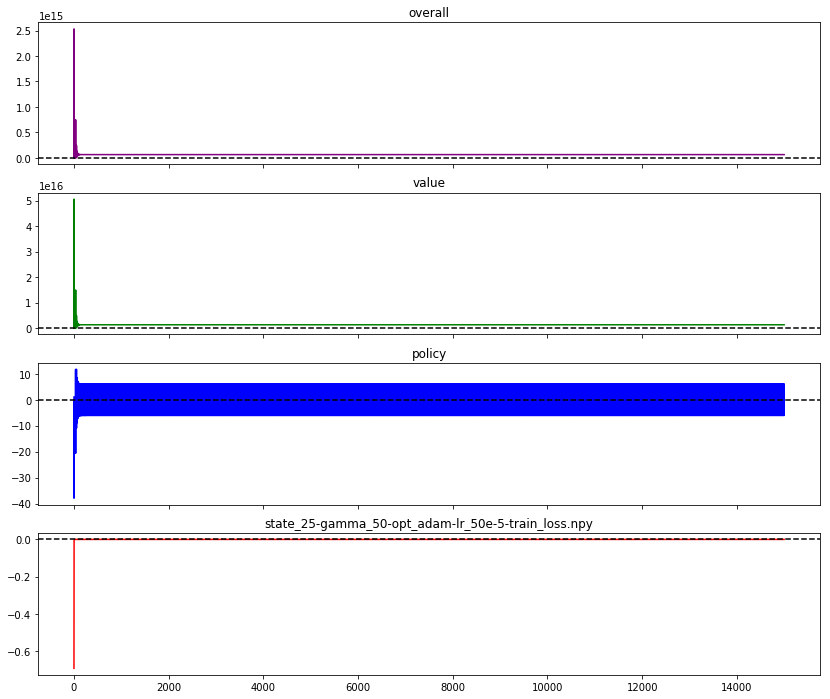

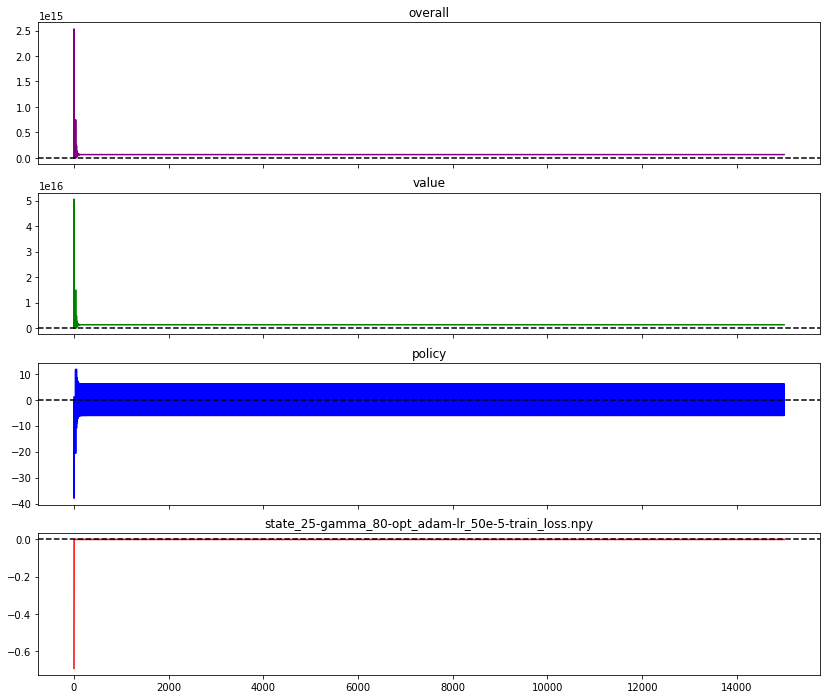

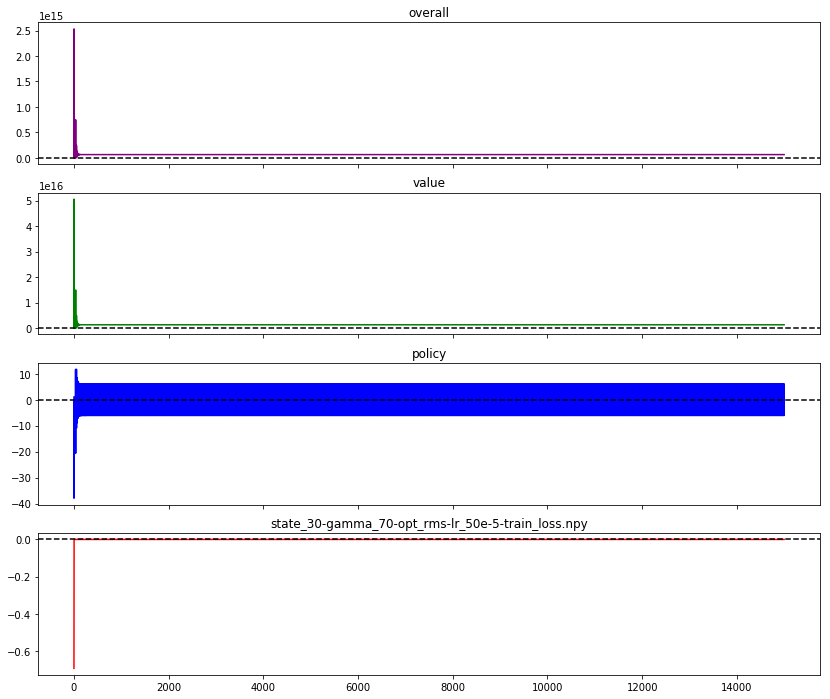

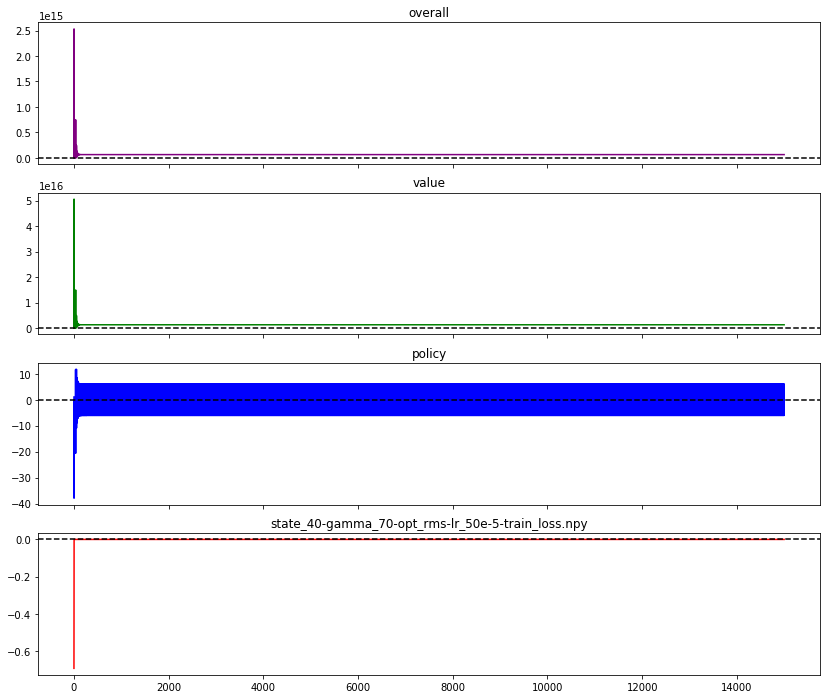

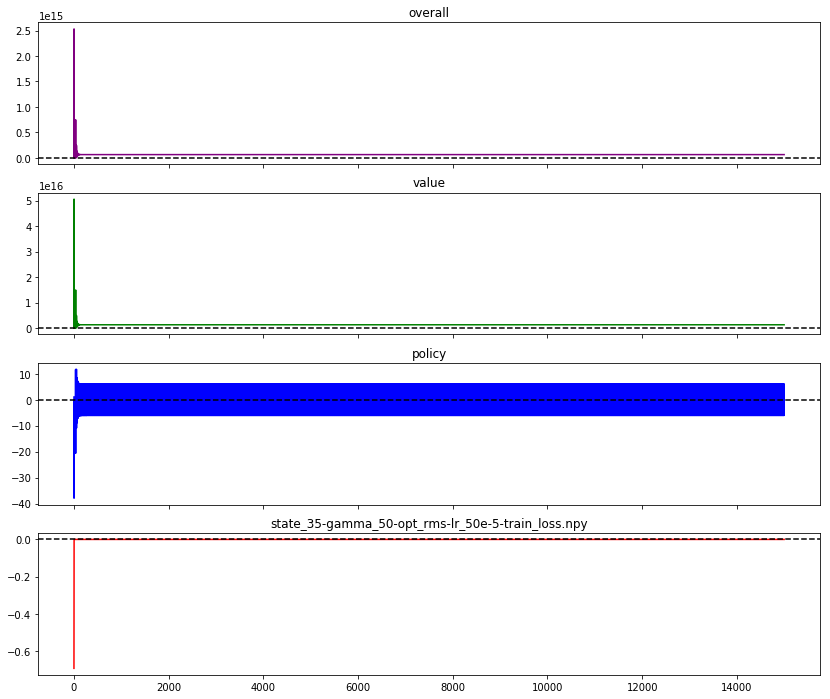

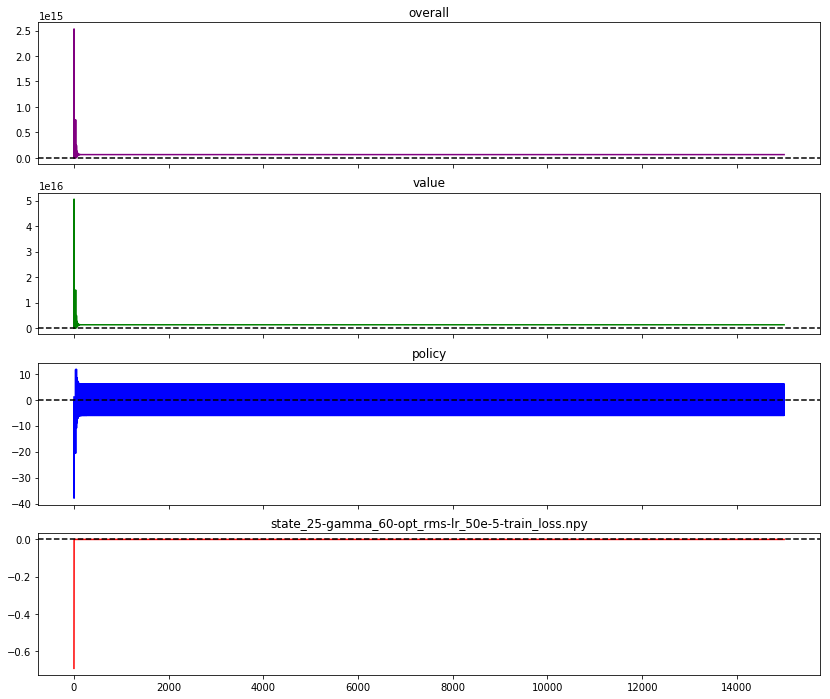

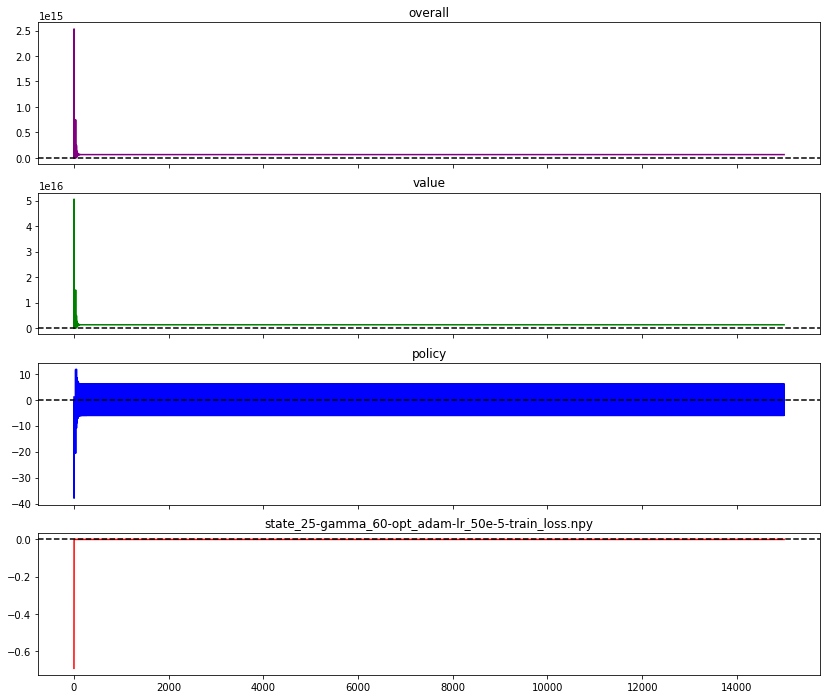

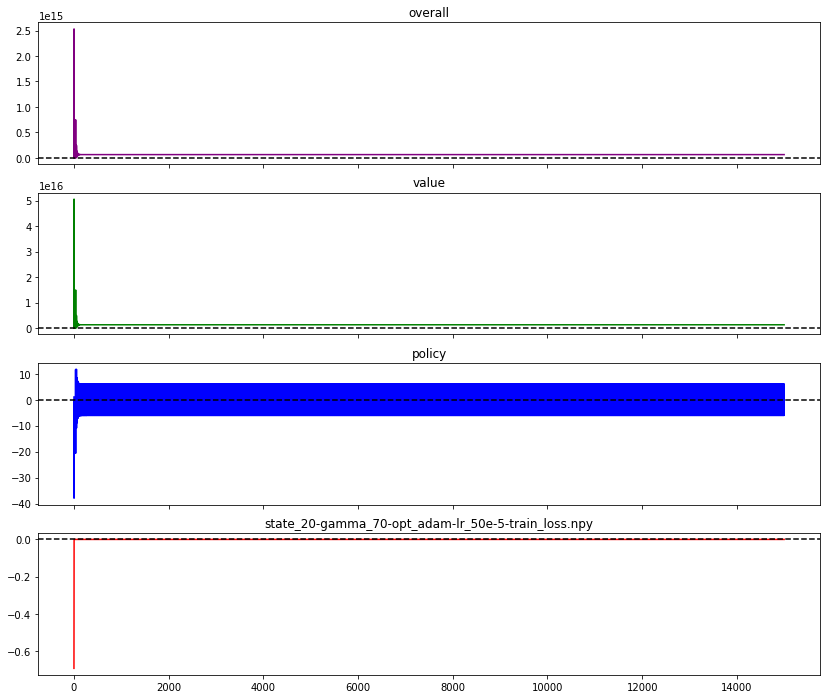

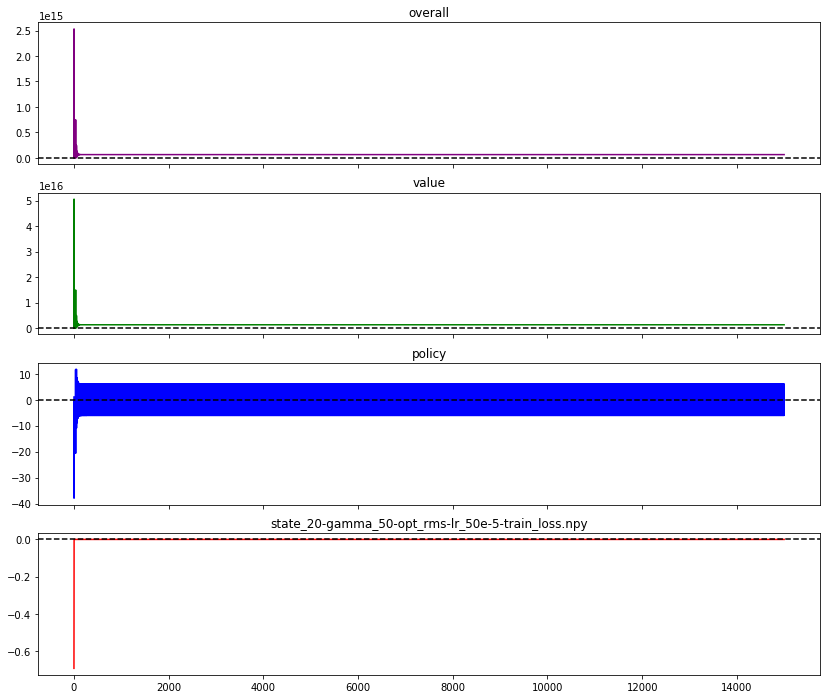

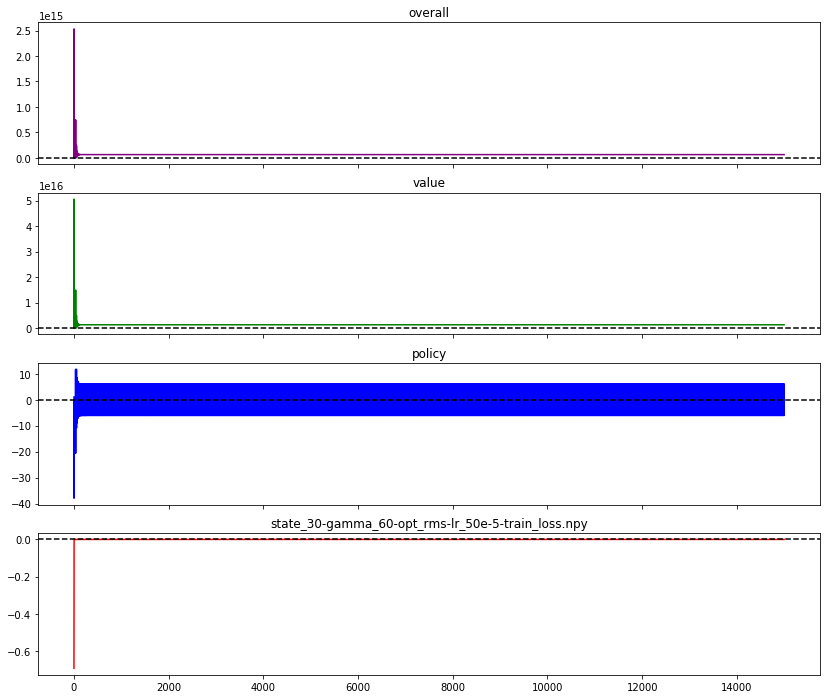

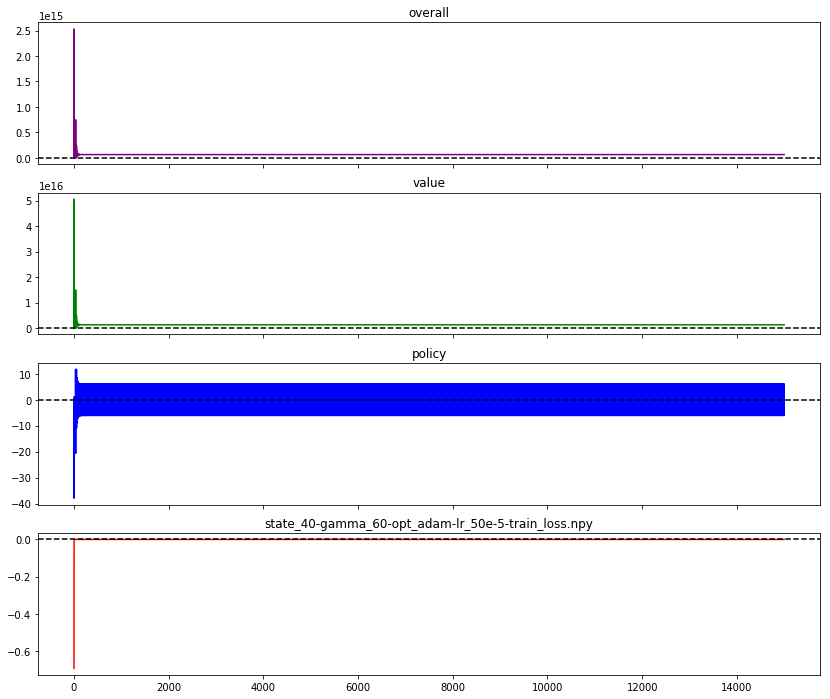

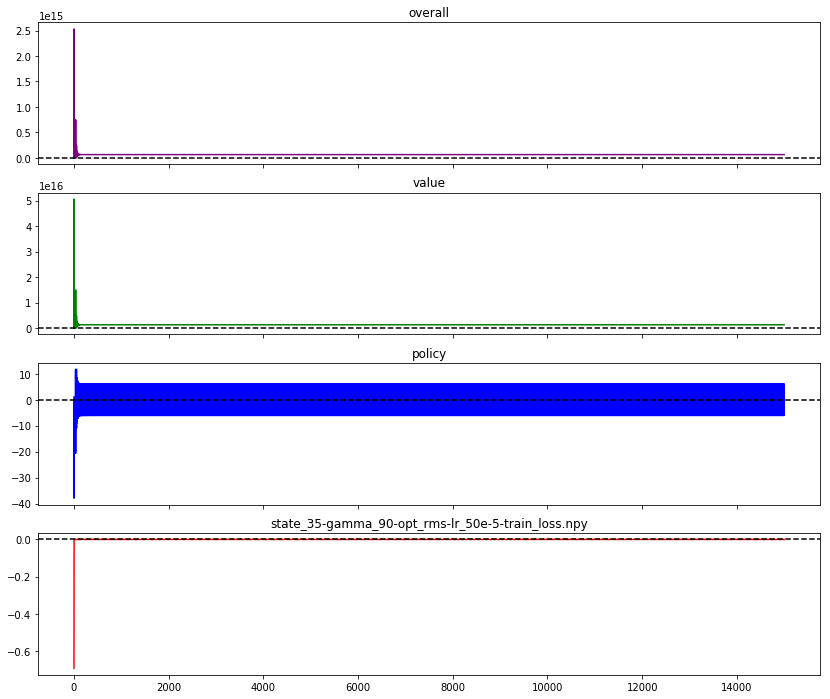

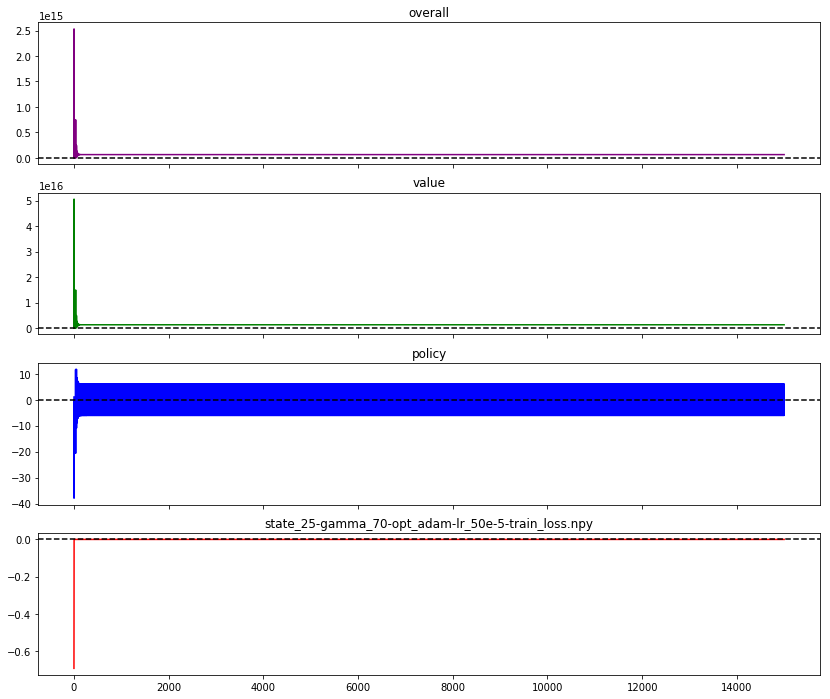

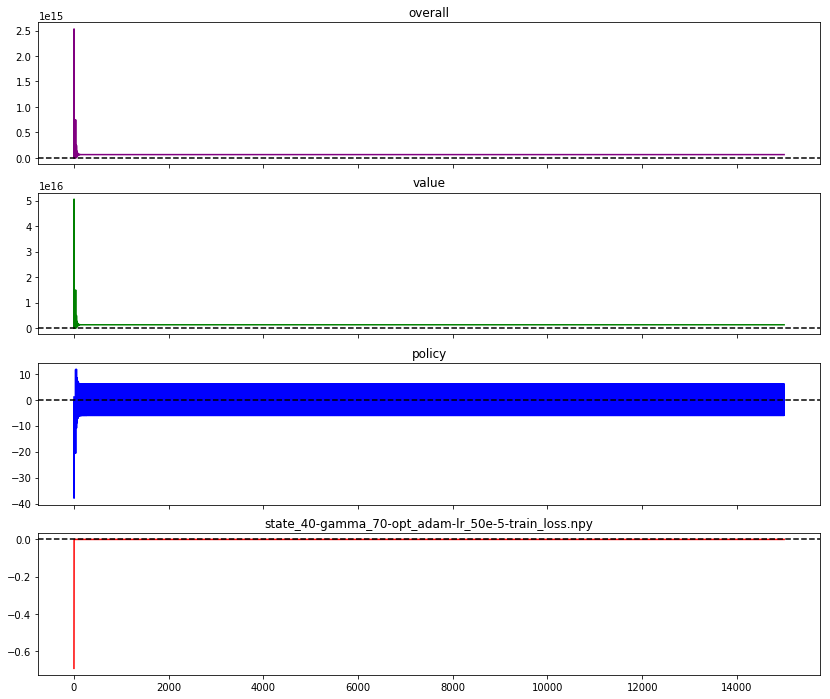

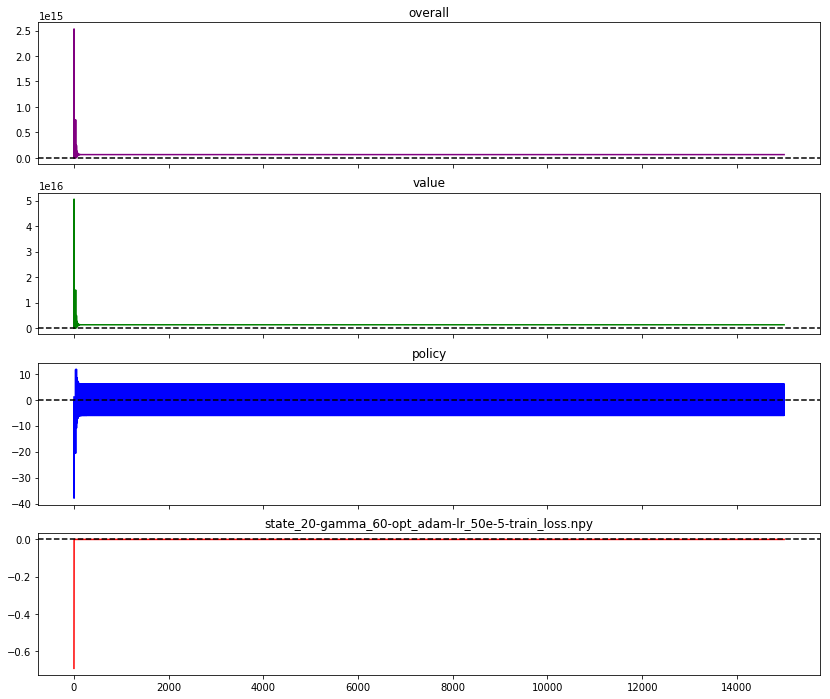

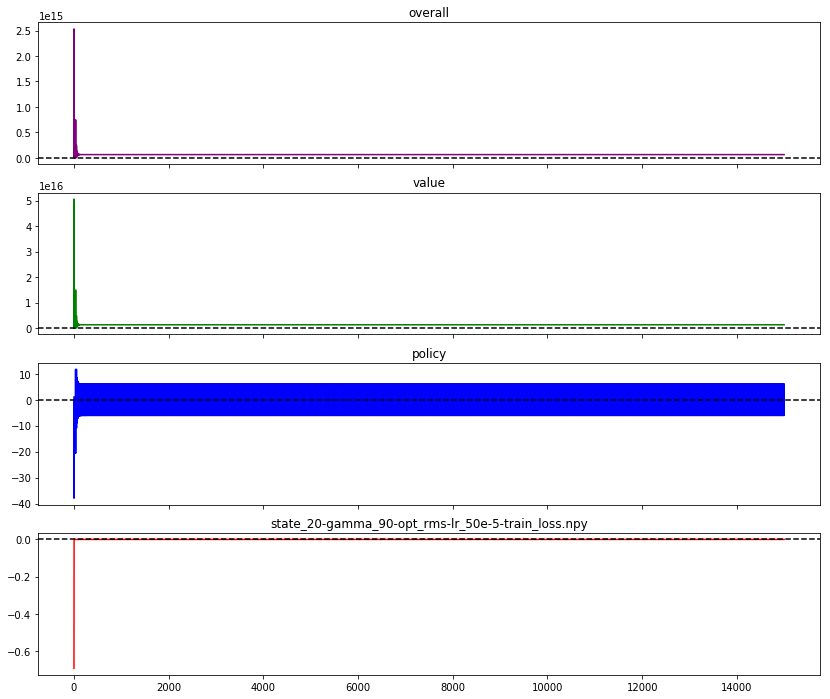

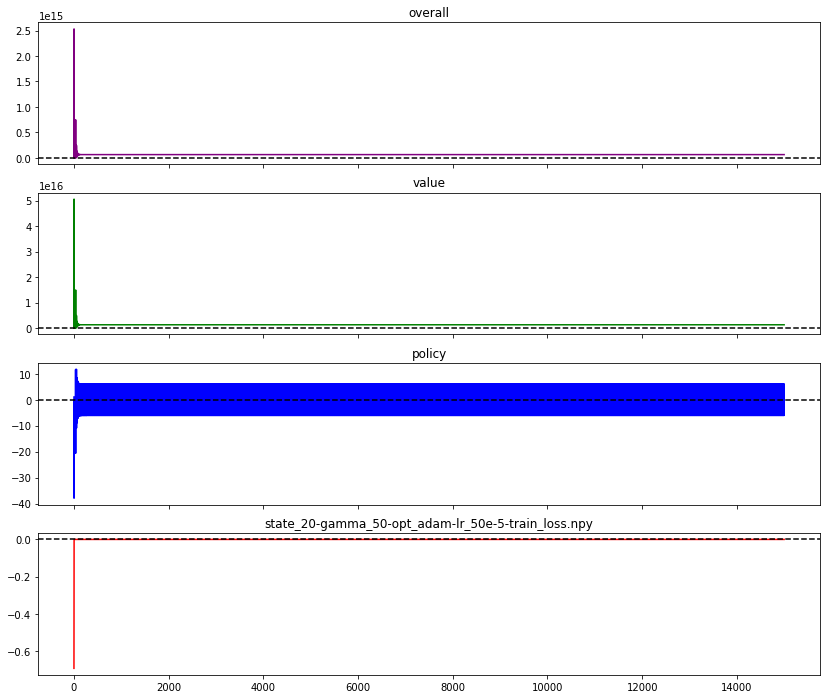

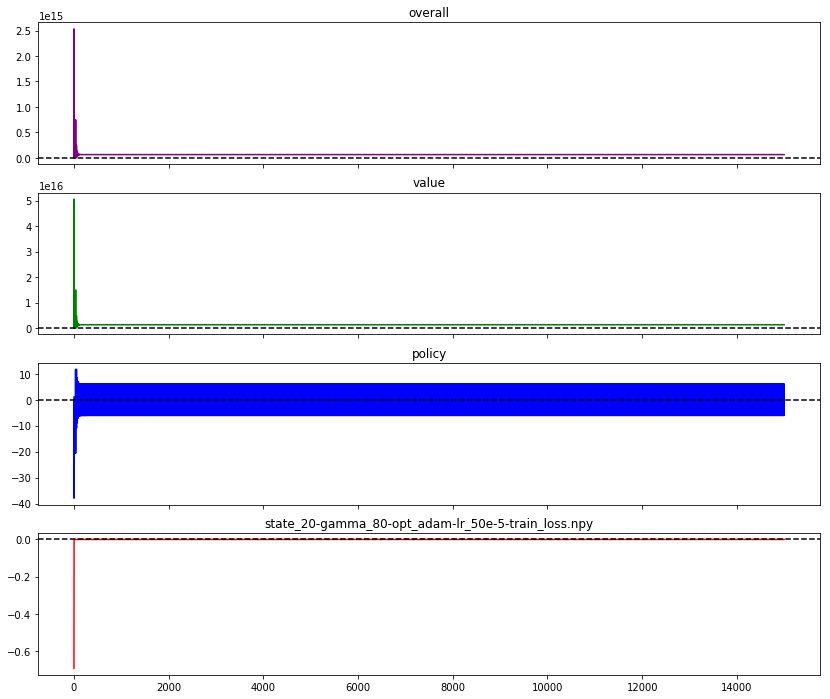

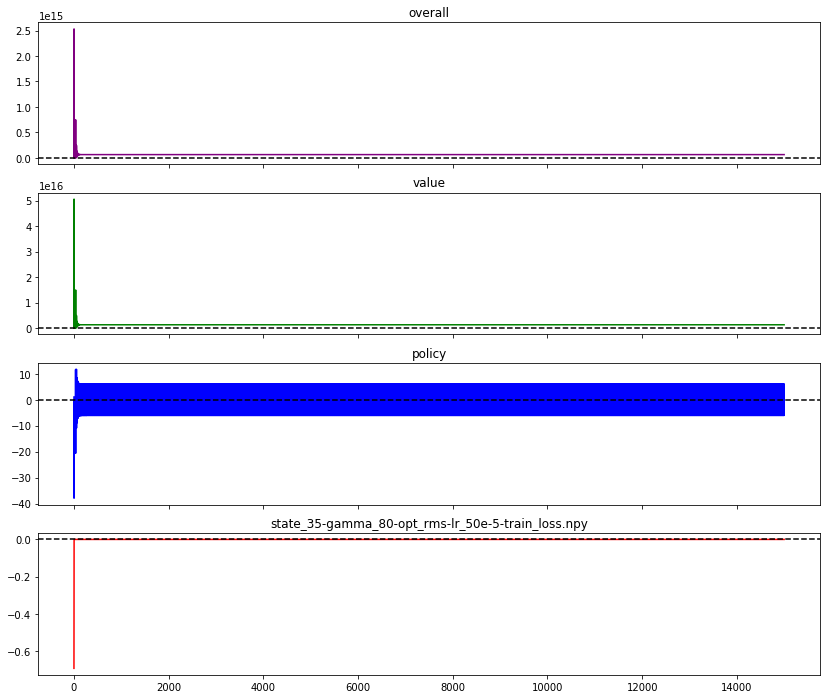

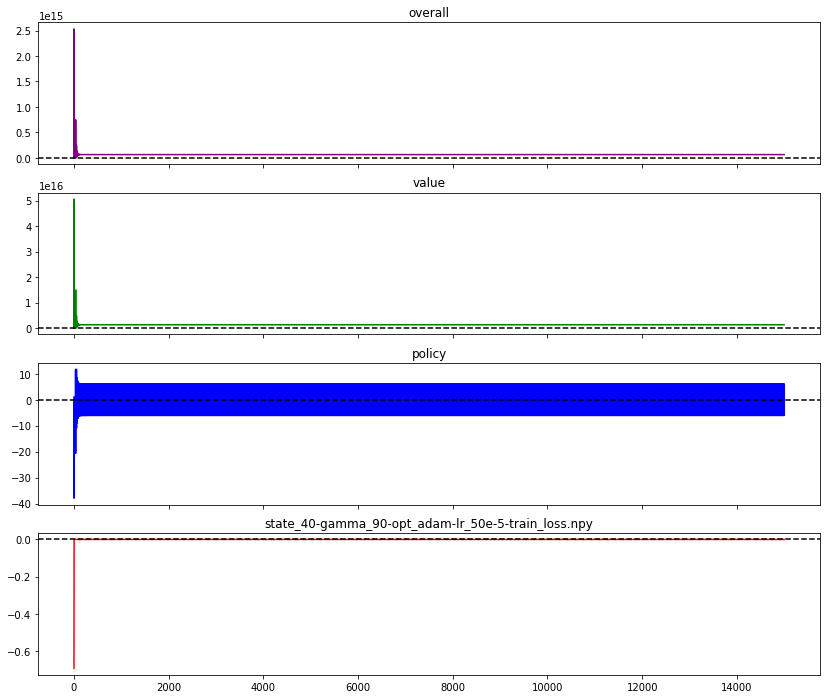

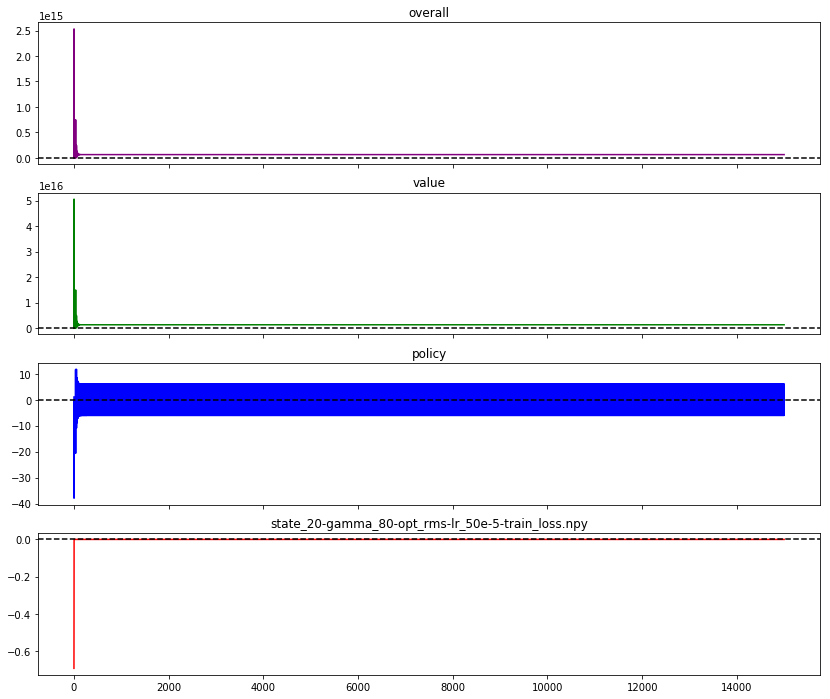

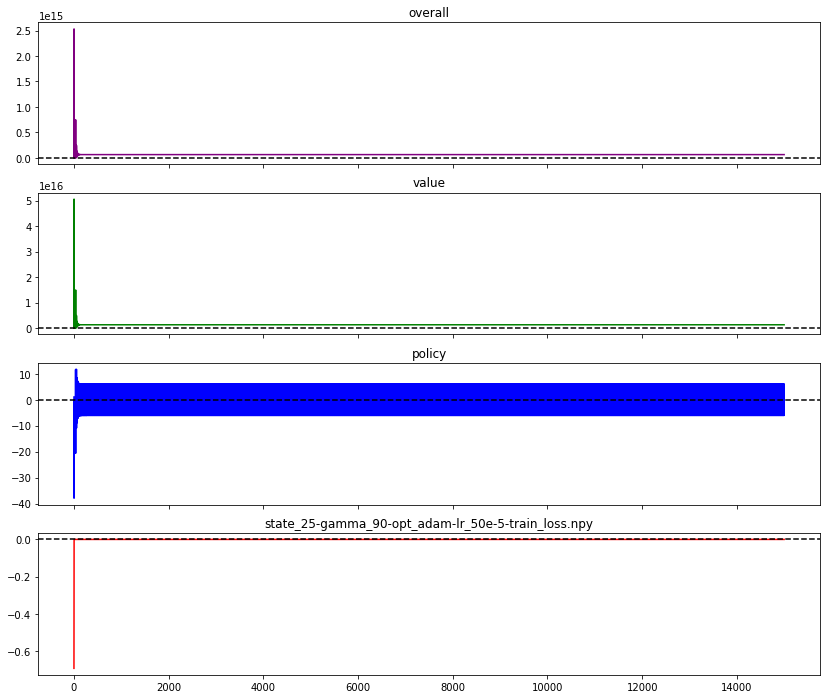

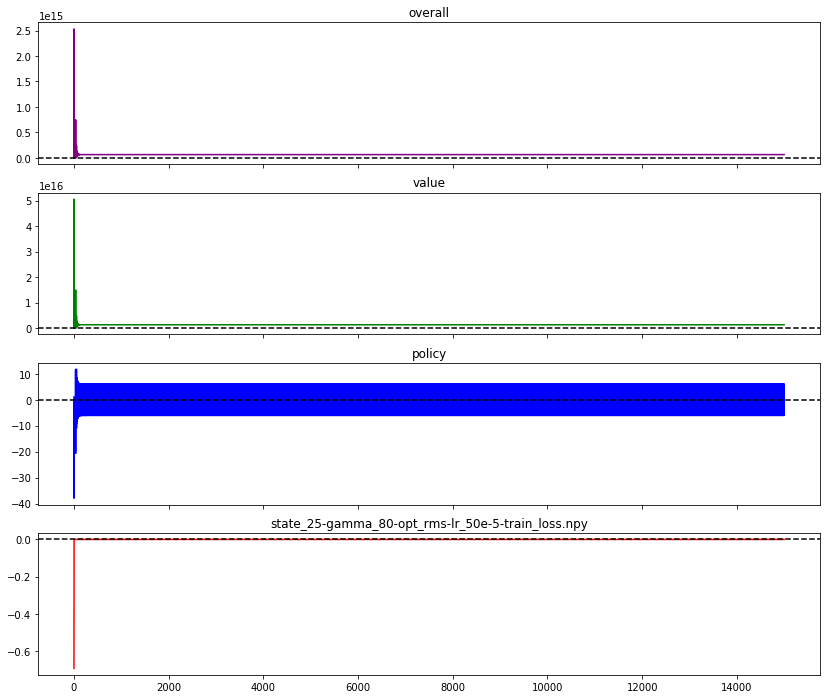

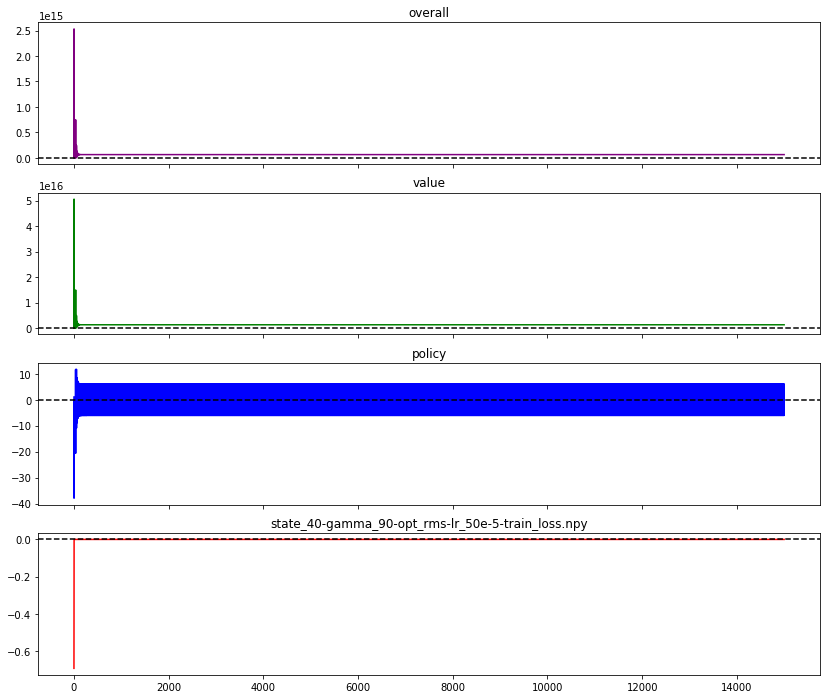

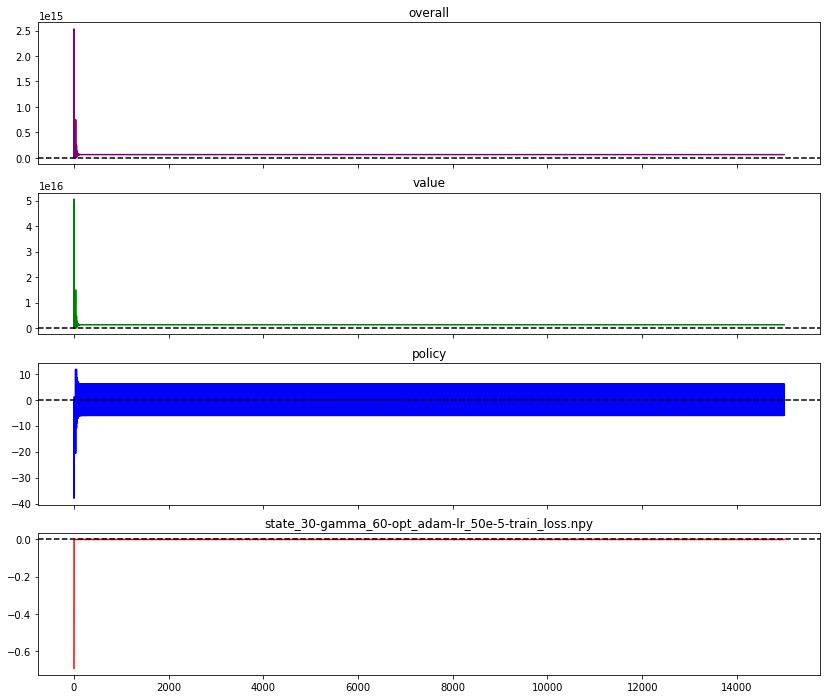

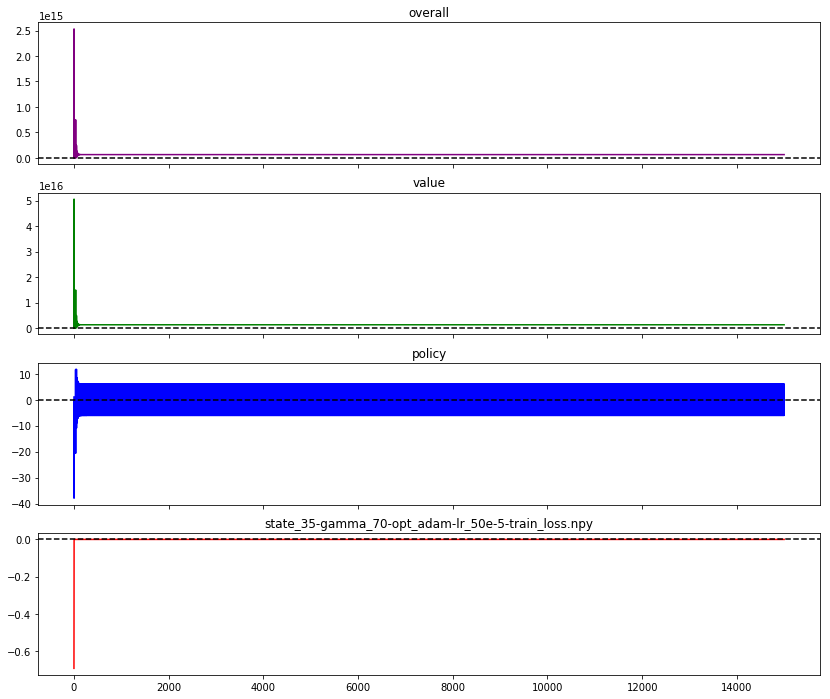

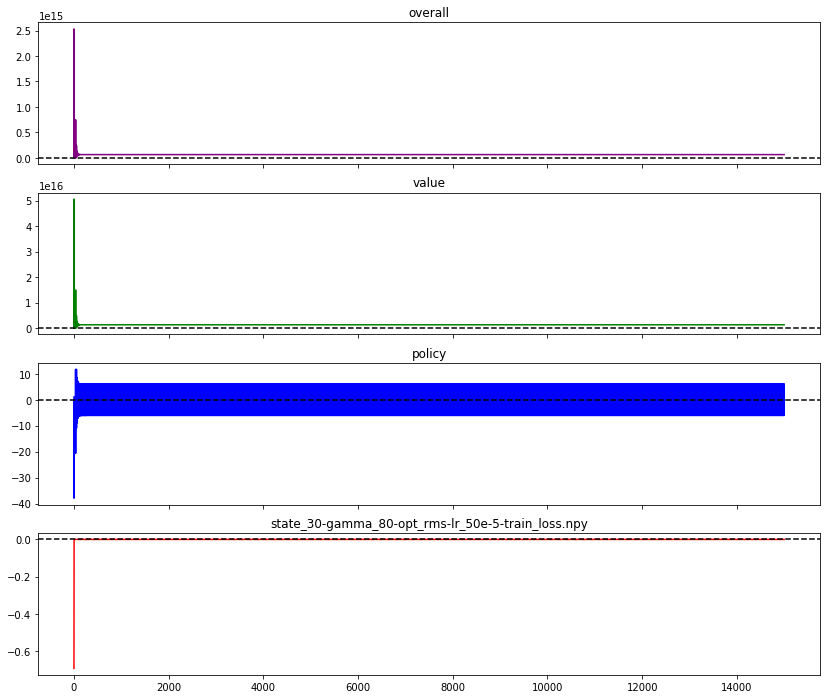

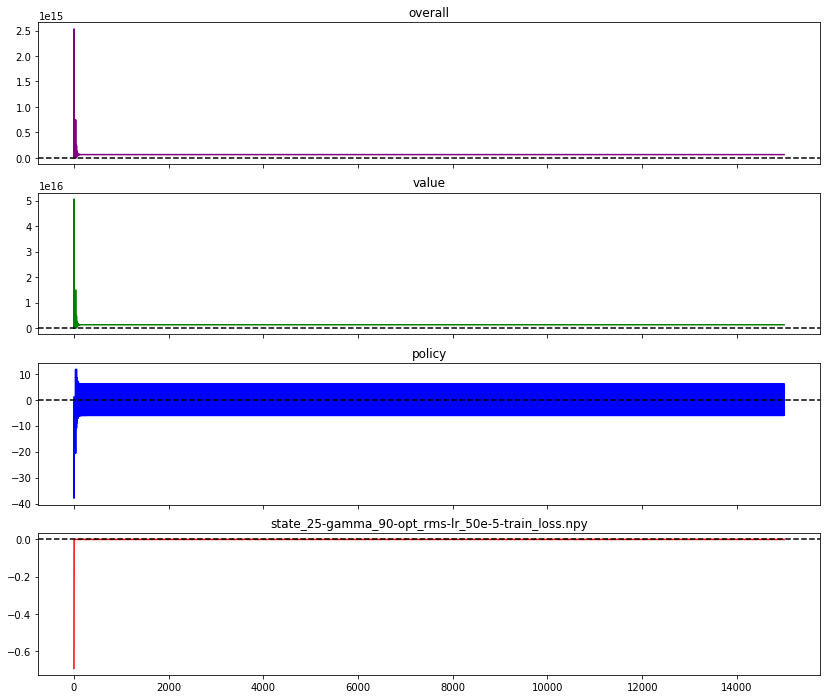

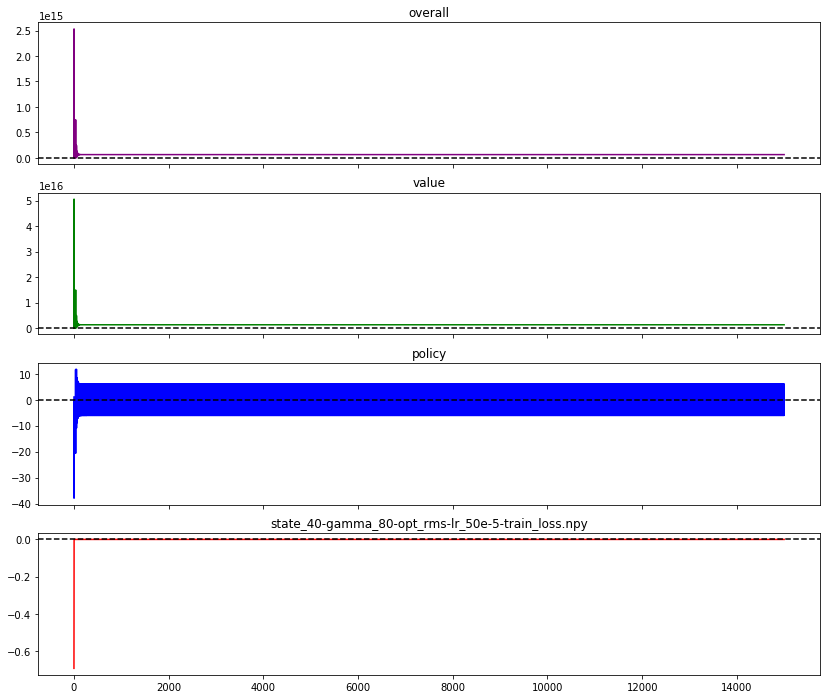

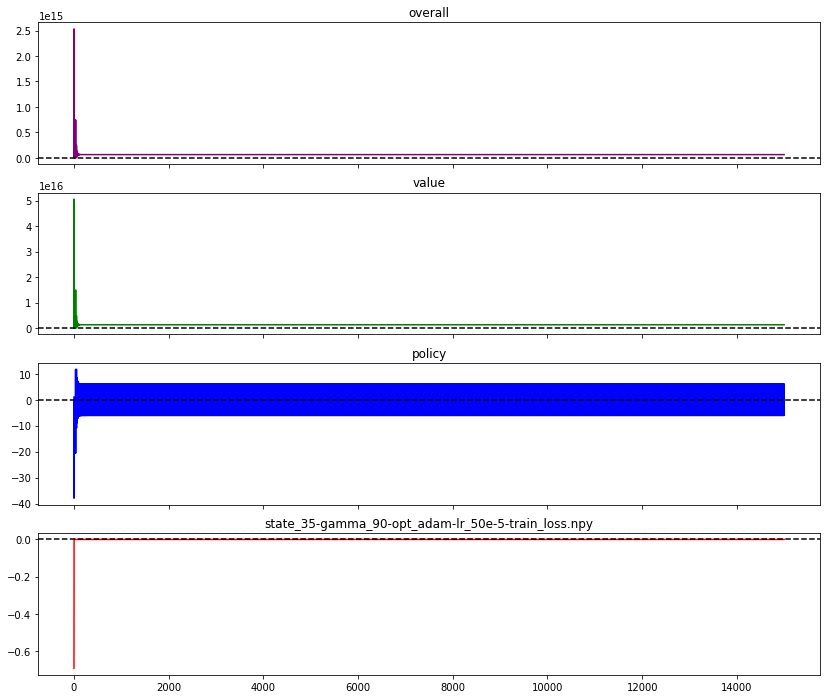

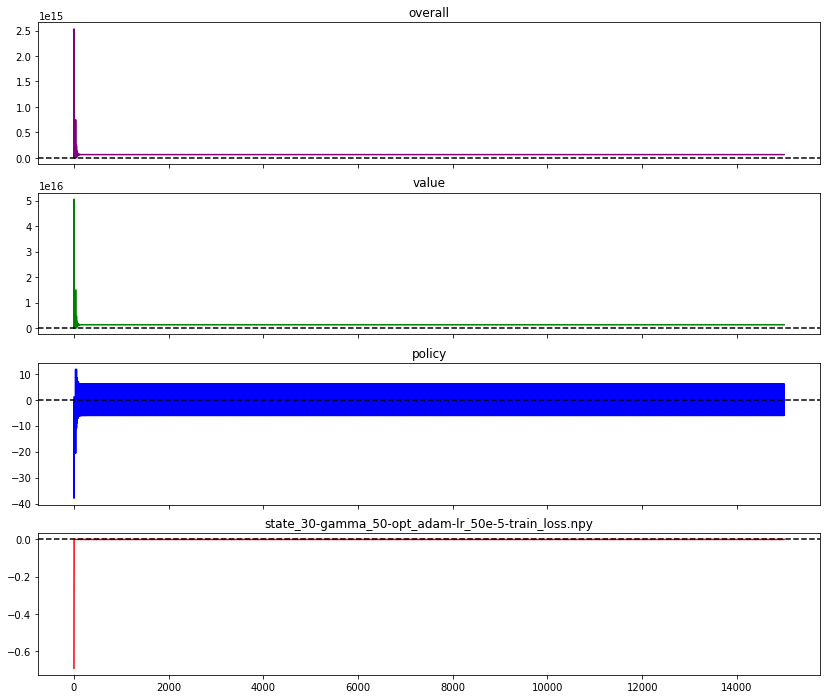

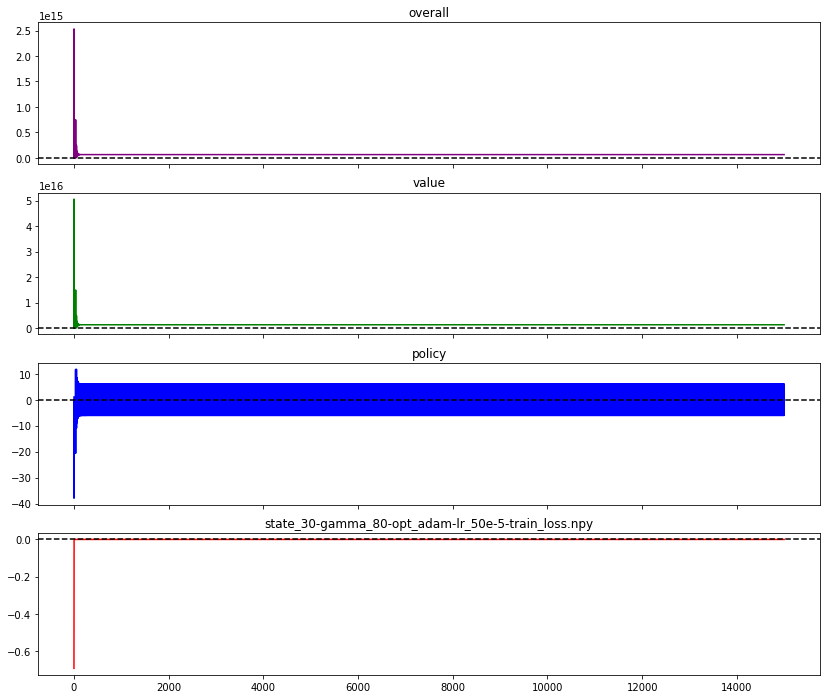

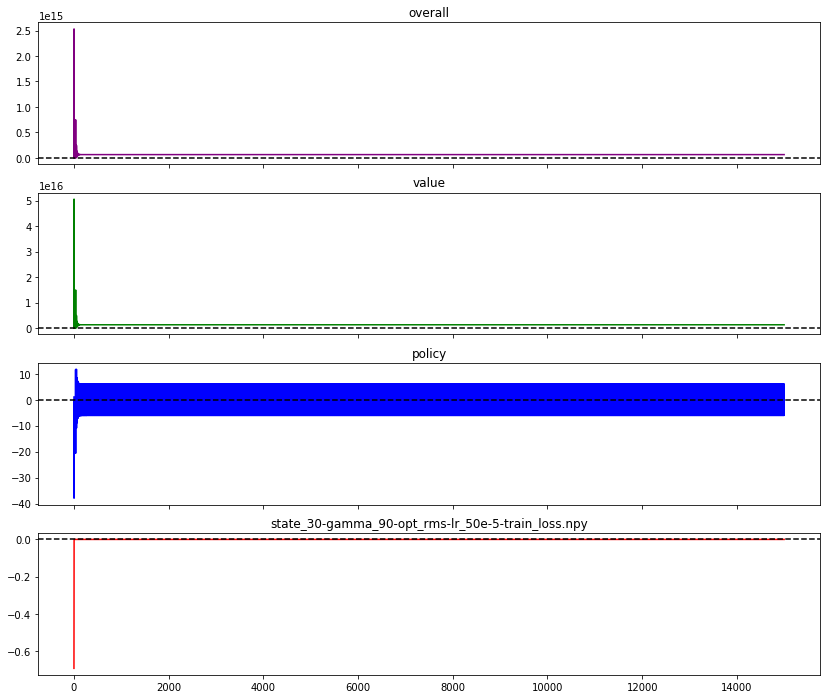

In [5]:
def plt_train_data(train_data):
  fig,axarr = plt.subplots(4,1,figsize=(14,12),sharex=True)
  cL = ['purple','g','b','r']
  titleL = ['overall','value','policy','entropy']
  for i in range(4):
    axarr[i].plot(train_data[:,i],c=cL[i])
    axarr[i].set_title(titleL[i])
    axarr[i].axhline(0,c='black',ls='--')

plt.close('all')
lr=50
fpathL = glob("models/sweep1/*/*/state_*-gamma_*-opt_*-lr_%ie-5-train_loss.npy"%(lr))
for fpath in fpathL:
  train_data = np.load(fpathL[0])
  plt_train_data(train_data)
  plt.title("".join(fpath.split('/')[-1]))

models/sweep2/state_30-gamma_70-opt_adam-lr_500e-5/002/state_30-gamma_70-opt_adam-lr_500e-5-trepochs4500-evalrewards82.npy
models/sweep2/state_30-gamma_70-opt_adam-lr_500e-5/002/state_30-gamma_70-opt_adam-lr_500e-5-trepochs1500-evalrewards82.npy
models/sweep2/state_30-gamma_70-opt_adam-lr_500e-5/002/state_30-gamma_70-opt_adam-lr_500e-5-trepochs3000-evalrewards28.npy
models/sweep2/state_30-gamma_70-opt_adam-lr_500e-5/002/state_30-gamma_70-opt_adam-lr_500e-5-trepochs3000-evalrewards82.npy
models/sweep2/state_30-gamma_70-opt_adam-lr_500e-5/002/state_30-gamma_70-opt_adam-lr_500e-5-trepochs4500-evalrewards28.npy
models/sweep2/state_30-gamma_70-opt_adam-lr_500e-5/002/state_30-gamma_70-opt_adam-lr_500e-5-trepochs1500-evalrewards28.npy


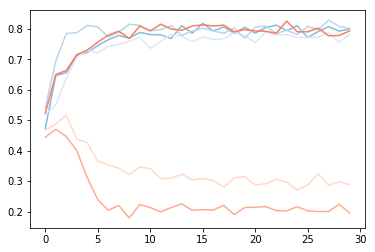

In [48]:
state = 40
gamma = 80
opt = 'adam'
lr = 10000
# fpathL = glob("models/sweep1/*/*/state_%i-gamma_%i-opt_%s-lr_%ie-5-trepochs*-evalrewards*.npy"%(state,gamma,opt,lr))
for fpath in fpathL:
  print(fpath)
  treps = int(fpath.split('/')[-1].split('-')[-2][len('trepochs'):])
  bandit = int(fpath.split('/')[-1].split('-')[-1][-6:-4])
  eval_data = np.load(fpath)
  if bandit==82:
    c=plt.get_cmap('Blues')(int(treps/40))
  else:
    c=plt.get_cmap('Reds')(int(treps/40))
  plt.plot(eval_data.mean(0),c=c)


82

In [27]:
fpath

'models/sweep1/state_35-gamma_60-opt_adam-lr_10e-5/001/state_35-gamma_60-opt_adam-lr_10e-5-trepochs4500-evalrewards82.npy'

In [26]:
splitf = fpath.split('/')[-1].split('-')
print(splitf)
state = splitf[0].split('_')[1]
gamma = splitf[1].split('_')[1]
opt = splitf[2].split('_')[1]
lr = splitf[3].split('_')[1]+'-5'


['state_35', 'gamma_60', 'opt_adam', 'lr_10e', '5', 'trepochs4500', 'evalrewards82.npy']
